**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬** <a name="chapter0"></a>
# Module 1 Final Project Submission

* Student name: **Beverly Delarosa**
* Student pace: **self-paced (February 11, 2019 cohort)**
* Scheduled project review date/time: **Tuesday, May 7 / 4:00pm PST**
* Instructor name: **Brandon Lewis**
* Blog post URL: **https://beverlyfdelarosa.github.io/chapter_3_-_using_the_ols_summary_report_to_your_advantage**

**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬**
# Predicting King County House Sales

## Table of Contents

1. [Introduction - Data Science Process](#chapter1)
2. [Data Mining and Obtaining](#chapter2)
3. [Data Cleaning and Scrubbing](#chapter3)
4. [Data Exploring and Feature Engineering](#chapter4)
5. [Predictive Data Modeling](#chapter5)
6. [Supporting the Intepreted Model](#chapter6)
7. [Conclusion - Future Applications](#chapter7)

<a name="chapter1"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬** 

[( Top of Page )](#chapter0)

## 1. Introduction - Data Science Process 

[( Next -- 2. Data Mining and Obtaining Data )](#chapter2) &nbsp;&nbsp; [( 3 )](#chapter3) &nbsp;&nbsp; [( 4 )](#chapter4) &nbsp;&nbsp; [( 5 )](#chapter5) &nbsp;&nbsp; [( 6 )](#chapter6) &nbsp;&nbsp; [( 7 )](#chapter7)

### ***`Objective: To ask relevant questions and define objectives for the problem(s) that need to be`***
### ***`tackled.`***

> ### 1.1 Problem: Predict the sale price of houses as accurately as possible.
> ### 1.2 How: Using the OSEMN Data Science Process.
>> The OSEMN framework is a straightforward project cycle. However, because the stage transitions are flexible to go back a step or two when we realize our current data isn't sufficient to solve this problem, we are able to treat this process more as a set of guidelines for structuring your project than an irreverable set of steps that cannot be violated. <br> <br>
>> **Obtain:** This step involves understanding the stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. <br><br>
>> **Scrub:** This step focuses on preprocessing (i.e. "clean" and filter) our data, which may include the following processes: organizing and tidying up the data, removing what is no longer needed, replacing what is missing, and standardizing the format across all the data collected. If the data used is unfiltered and irrelevant, the analysis' results will not mean anything as well. <br><br>
>> **Explore:** This step focuses on getting to know the DataFrame you're working with through the use of visualizations and descriptive statistics. The goal of this step is to have a DataFrame apt for the modeling phase. <br><br>
>> **Model:** This step consists of building and tuning models in order to understand the logic behind the clusters of the grouping of data that gave us the classificiation or prediction of the results. This includes definining a threshold for success and selecting machinine learning algorithms to test our project to solve our problems. This step can also be used to adapt to any changes made from the Scrub and Explore steps (and vice versas) mentioned above. <br><br>
>> **Interpret:** This step refers to the presentation of our data and delivering the results in such a way that is able to answer the stakeholder requirements and problem, along with other actionable insights and notable mentionables that are found through our whole data science process.
> ### 1.3 The Multiple Linear Regression Model.
>> **Ordinary Least Squares (OLS) is the most common estimation method for linear models.** See my blog post for an introduction and basic understanding for how to set yourself up for the best possible estimates by complying with fundamental assumptions.

<a name="chapter2"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬** 

[( Top of Page )](#chapter0) &nbsp;&nbsp; [( Previous -- 1. Introduction - Data Science Process )](#chapter1) 

## 2. Data Mining and Obtaining 

[( Next -- 3. Cleaning and Scrubbing Data )](#chapter4) &nbsp;&nbsp; [( 4 )](#chapter4) &nbsp;&nbsp; [( 5 )](#chapter5) &nbsp;&nbsp; [( 6 )](#chapter6) &nbsp;&nbsp; [( 7 )](#chapter7)

### ***`Objective: To identify and collect data of interest from different legal/credible sources.`***

> ### 2.1 Importing the necessary libraries.
>> **We will need libraries to load our data, visualize it, do necessary transformations, and built and evaluate our model.** See the comments for their more descriptive use.

In [1]:
import pandas as pd # For data handling 
import seaborn as sns # For visualizations 
import matplotlib.pyplot as plt # For visualizations 
%matplotlib inline
plt.style.use('ggplot') # For viewing a grid on plot 

import numpy as np # For stats 
import warnings # For disabling all warnings 
warnings.filterwarnings('ignore')

#For predicting and supporting our intepreted model
import random
from statsmodels.formula.api import ols # For OLS 
from sklearn.model_selection import train_test_split # For evaluating our model
from sklearn.linear_model import LinearRegression # For OLS (without statistical metrics of the parameter estimates readily available) - YES
from sklearn.metrics import mean_squared_error # For mean squared error
from sklearn.model_selection import cross_val_score # For validating our model 
from sklearn.feature_selection import RFE # For recursive feature elimination
import statsmodels.api as sm # For residuals (variance error term) (OLS) and heteroscedasticity
import statsmodels.stats.api as sms # For JB and GQ tests

> ### 2.2 Loading the King County House Sales DataSet.
>> **After loading our DataSet, we can quickly see what we're working with.** First thing we can notice are the target and features we have, and their meanings as provided:
* "Id" -- Unique identifier for a house
* "Date" -- When the house was sold
* "Price" -- Value of house
* "Bedrooms" -- Number of bedrooms
* "Bathrooms" -- Number of bathrooms
* "Sqft_Living" -- Square footage of the interior housing living space
* "Sqft_Lot" -- Square footage of the land lot
* "Floors" -- Number of floors (levels) in the house
* "Waterfront" -- House which has a view to a waterfront
* "View" -- Has been viewed
* "Condition" -- How good the (overall) condition is
* "Grade" -- Overall grade given to the housing unit, based on King County grading system
* "Sqft_Above" -- Square footage of house apart from basement
* "Sqft_Basement" -- Square footage of the basement
* "Yr_Built" -- Year when house was built
* "Yr_Renovated" -- Year when house was renovated
* "Zipcode" -- ZIP code
* "Lat" -- Latitude coordinate
* "Long" -- Longitude coordinate
* "Sqft_Living15" -- Square footage of interior housing living space for the nearest 15 neighbors
* "Sqft_Lot15" -- Square footage of the land lots of the nearest 15 neighbors

In [2]:
# Importing our data
df = pd.read_csv("kc_house_data.csv")

# Setting the column names as our headers
df.columns = [col_name.title() for col_name in list(df.columns)]

# Seeing what type of data we are working with, their descriptive stats, and a preview of our DataFrame
display(df.info(), 
        pd.DataFrame(data = df.nunique().sort_values(), columns=['Counts']).transpose(),
        df.describe(), 
        df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
Id               21597 non-null int64
Date             21597 non-null object
Price            21597 non-null float64
Bedrooms         21597 non-null int64
Bathrooms        21597 non-null float64
Sqft_Living      21597 non-null int64
Sqft_Lot         21597 non-null int64
Floors           21597 non-null float64
Waterfront       19221 non-null float64
View             21534 non-null float64
Condition        21597 non-null int64
Grade            21597 non-null int64
Sqft_Above       21597 non-null int64
Sqft_Basement    21597 non-null object
Yr_Built         21597 non-null int64
Yr_Renovated     17755 non-null float64
Zipcode          21597 non-null int64
Lat              21597 non-null float64
Long             21597 non-null float64
Sqft_Living15    21597 non-null int64
Sqft_Lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

,Waterfront,View,Condition,Floors,Grade,Bedrooms,Bathrooms,Zipcode,Yr_Renovated,Yr_Built,...,Date,Long,Sqft_Living15,Sqft_Above,Sqft_Living,Price,Lat,Sqft_Lot15,Sqft_Lot,Id
Counts,2,5,5,6,11,12,29,70,70,116,...,372,751,777,942,1034,3622,5033,8682,9776,21420


,Id,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


,Id,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


> ### 2.3 Initial observations.
>> **Most of the DataFrame looks good. However, we have incomplete information and various data types for some columns.** We can eliminate and select some features right at the beginning of this step which we think will be good for our model to our problem that we are trying to solve:
* "Id" -- No missing data; We will use as our index later; There are multiple times where the same house has been sold (we can assume after being renovated)
* "Date" -- No missing data; Categorical data should be converted to datetime type; We need to investigate if the date sold is relevant (especially with the "Id" variable being present)
* "Price" -- No missing data; Our prediction target variable
* "Bedrooms" -- No missing data; We need to investigate if the 33 max value is an outlier or error
* "Bathrooms" -- No missing data
* "Sqft_Living" -- No missing data; We need to investigate if separated as "Sqft_Above" and "Sqft_Basement" makes a difference to this total
* "Sqft_Lot" -- No missing data
* "Floors" -- No missing data
* "Waterfront" -- Has some missing values, but may still be useful for our analysis; Two unique values justify us to convert to categorigal/binary data
* "View" -- Has very little missing values, but may still be useful for our analysis; Because the description given is "has been viewed" rather than "how many times it has been viewed", we can possilby justify to convert to categorigal/binary data
* "Condition" -- No missing data; Five unique values justify to convert to categorigal data for easier grouping analysis
* "Grade" -- No missing data; We can possilby justify to categorigal data for easier grouping analysis if we know the grade scale
* "Sqft_Above" -- No missing data
* "Sqft_Basement" -- No missing data; Should be converted to numerical type
* "Yr_Built" -- No missing data
* "Yr_Renovated" -- Has missing values, but may still be useful for our analysis; And thus, because of the low mean and high standard deviation, we want to investigate if converting to categorical/binary data would be better
* "Zipcode" -- No missing data; We need to investigate if neighborhoods (last five variable bullets) have an impact
* "Lat" -- No missing data; We need to investigate if neighborhoods (last five variable bullets) have an impact
* "Long" -- No missing data; We need to investigate if neighborhoods (last five variable bullets) have an impact
* "Sqft_Living15" -- No missing data; We need to investigate if neighborhoods (last five variable bullets) have an impact
* "Sqft_Lot15" -- No missing data; We need to investigate if neighborhoods (last five variable bullets) have an impact

<a name="chapter3"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬**

[( Top of Page )](#chapter0) &nbsp;&nbsp; [( 1 )](#chapter1) &nbsp;&nbsp; [( Previous -- 2. Data Mining and Obtaining Data )](#chapter2) 

## 3. Data Cleaning and Scrubbing

[( Next -- 4. Exploring and Feature Engineering )](#chapter4) &nbsp;&nbsp; [( 5 )](#chapter5) &nbsp;&nbsp; [( 6 )](#chapter6) &nbsp;&nbsp; [( 7 )](#chapter7)

### ***`Objective: To fix the inconsistencies, cluttered, and unsuitable for analysis data in a format`*** 
### ***`that the machine will understand.`***

>### 3.1 Dealing with different types of data and missing values from data.
>>**Machine learning algorithms works only with complete, numerical data.** First, we'll be specificially changing our object types (i.e., values that are presented as a string) to numerical values (i.e., values that are presented as an integer or floating decimal). We will convert appropriate predictor columns into categories later. Let's further organize our data to appropriately keep, remove, or fill in our missing data values.

In [3]:
# Changing object type into datetime type
df.Date = pd.to_datetime(df.Date)

In [4]:
# Determining what to do with the missing values in "Sqft_Basement"

# Checking for unusual values
display(df.Sqft_Basement.value_counts().head())

# Counting function of unique values as Boolean
display("Number of rows with 0 basements:", (df.Sqft_Basement == "0.0").value_counts(normalize=False))
display("Percentage of rows with 0 basements:", (df.Sqft_Basement == "0.0").value_counts(normalize=True))

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: Sqft_Basement, dtype: int64

'Number of rows with 0 basements:'

True     12826
False     8771
Name: Sqft_Basement, dtype: int64

'Percentage of rows with 0 basements:'

True     0.593879
False    0.406121
Name: Sqft_Basement, dtype: float64

>> **Because the bulk of our houses (59%) have no basements, we can safely assume that this "Basement" variable is categorical.** For now, let's replace our missing values to 0 and leave the square footage as is. We'll change it to a binary variable after further investigations.

In [5]:
df.Sqft_Basement = df.Sqft_Basement.apply(lambda x: "0" if x == "?" else x) # Replacing missing values
df.Sqft_Basement = df.Sqft_Basement.astype(float) # Changing object type into float type

# Checking if the changes were applied to our variable
basement = df.Sqft_Basement

print("Updated number of rows with 0 basements:", sum(basement == 0.0))
print("Number of rows that have basements:", sum(basement != 0.0))

Updated number of rows with 0 basements: 13280
Number of rows that have basements: 8317


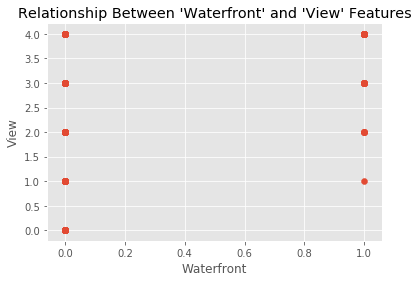

How many 'Waterfront' null values there are: 2376
Percentage of 'Waterfront' null values we can replace confidently: 88.8 % 

How many 'View' null values there are: 63
Percentage of 'View' null values we can replace confidently: 88.89 %


In [6]:
# Determining what to do with the missing values in "Waterfront" and "View"

# Testing an assumption if a house has a waterfront, then they have been viewed; this can also be applied vise versa
plt.scatter(df.Waterfront, df.View)
plt.title("Relationship Between 'Waterfront' and 'View' Features")
plt.xlabel("Waterfront"), plt.ylabel("View")
plt.show()

# Checking how confident we could change our NaN values to 0, or if the rows they should just be dropped
print("How many 'Waterfront' null values there are:", sum(df.Waterfront.isna()))
print("Percentage of 'Waterfront' null values we can replace confidently:", round(len(df[(df.Waterfront.isna()) & (df.View == 0)]) / sum(df.Waterfront.isna()) * 100, 2), "%","\n")

print("How many 'View' null values there are:", sum(df.View.isna()))
print("Percentage of 'View' null values we can replace confidently:", round(len(df[(df.View.isna()) & (df.Waterfront == 0)]) / sum(df.View.isna()) * 100, 2), "%")

>> **Our assumption holds true.** The graph gives us clear evidence that houses that have not been viewed also do not have a waterfront. Both our "Waterfront" and "View" median is 0, and almost 89% of our NaN values can confindently be replaced by 0s. The median value is a good choice because it is least likely to influence the distribution of the overall DataFrame. Because the data is not symmetric, the mean can skew the graph from outliers.

In [7]:
df.loc[df.Waterfront.isna(), "Waterfront"] = 0 # Replacing missing values
df.Waterfront = df.Waterfront.astype(int) # Changing float type to integer type

df.loc[df.View.isna(), "View"] = 0 # Replacing missing values
df.View = df.View.astype(int) # Changing float type to integer type

# Checking if the changes were applied to our variables
display(df.Waterfront.value_counts(), df.View.value_counts())

0    21451
1      146
Name: Waterfront, dtype: int64

0    19485
2      957
3      508
1      330
4      317
Name: View, dtype: int64

>> **Determining what to do with the missing values in "Yr_Renovated".** Unless we had the blueprints of all the houses, comparing "Yr_Renovated" with any other variable is non-sensical and near impossible to get a credible relationship. So we can either just drop this column, or change all the NaN values to the median value. For now, let's replace our missing values to 0; further investigation is needed to decide if this variable is a reliable, indpendent factor.

In [8]:
df.loc[df.Yr_Renovated.isna(), "Yr_Renovated"] = 0 # Replacing missing values
df.Yr_Renovated = df.Yr_Renovated.astype(int) # Changing float type to integer type

# Checking if the changes were applied to our variable
display(df.Yr_Renovated.value_counts().head())

0       20853
2014       73
2003       31
2013       31
2007       30
Name: Yr_Renovated, dtype: int64

>> **Our DataFrame is complete for machine learning algorithms.** There are no missing values or categorical data types (we'll deal with the "Date" feature later), but it is not yet reliable for us to do a regression analysis. So, we will go back and forth from the contributions of data exploring and feature engineering along with further fine-tuning the inconsistencies as we come across it. As we continue to modify our DataFrame, we can select important, measurable features to be able to construct a hypotheses about our defined problem.

In [9]:
# Seeing our updated DataFrame's descriptive stats and preview
display(df.info(), 
        pd.DataFrame(data = df.nunique().sort_values(), columns=['Counts']).transpose(),
        df.describe(), 
        df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
Id               21597 non-null int64
Date             21597 non-null datetime64[ns]
Price            21597 non-null float64
Bedrooms         21597 non-null int64
Bathrooms        21597 non-null float64
Sqft_Living      21597 non-null int64
Sqft_Lot         21597 non-null int64
Floors           21597 non-null float64
Waterfront       21597 non-null int32
View             21597 non-null int32
Condition        21597 non-null int64
Grade            21597 non-null int64
Sqft_Above       21597 non-null int64
Sqft_Basement    21597 non-null float64
Yr_Built         21597 non-null int64
Yr_Renovated     21597 non-null int32
Zipcode          21597 non-null int64
Lat              21597 non-null float64
Long             21597 non-null float64
Sqft_Living15    21597 non-null int64
Sqft_Lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int32(3), int64(11)
memory usage:

None

,Waterfront,View,Condition,Floors,Grade,Bedrooms,Bathrooms,Zipcode,Yr_Renovated,Yr_Built,...,Date,Long,Sqft_Living15,Sqft_Above,Sqft_Living,Price,Lat,Sqft_Lot15,Sqft_Lot,Id
Counts,2,5,5,6,11,12,29,70,70,116,...,372,751,777,942,1034,3622,5033,8682,9776,21420


,Id,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


,Id,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0.0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0.0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570


> ### 3.2 Reducing our DataFrame.
>> **We can already identify outliers/reduntancies within our 21597 rows/number of houses.** We know that individually, skewness can negativly impact the predictor's magnitude to the rest of the data. Let's comb through a couple specific ones and get rid of them. <br><br>
>> **Based on the descriptions of the variables, there's no need to keep all three columns for the area of the house.** We know that "Sqft_living" = "Sqft_Above" + "Sqft_Basement" may not be true for some values due to our original missing "Sqft_Basement" rows. So let's remove those rows as they may not be reliable. Because we can compare the significance of "Floors" to "Price", let's remove "Sqft_Above" and "Sqft_Basement" columns to reduce our redundancy.

In [10]:
# Confirming the rows where "Sqft_living" = "Sqft_Above" + "Sqft_Basement"
area = df.Sqft_Living
total = df.Sqft_Above + df.Sqft_Basement

print("Number of rows with NOT equal house square footage (to be dropped):", len(df) - ((total == area).sum()))
print("Updated number of rows in our DataFrame:", (total == area).sum())

# Dropping the NOT equal rows 
df = df[area == total]

# Dropping the "Sqft_Above" and "Sqft_Basement"" columns
df.drop(["Sqft_Above", "Sqft_Basement"], axis=1, inplace=True)

# Checking if the changes were applied to our DataFrame
print("Updated number of columns in our DataFrame:", len(df.columns))

Number of rows with NOT equal house square footage (to be dropped): 170
Updated number of rows in our DataFrame: 21427
Updated number of columns in our DataFrame: 19


>> **Similarly, "Zipcode" may be a better identifier than "Lat" and "Long", and "Sqft_Living15" and "Sqft_Lot15".** Although ZIP codes were created by the US Postal Service to expedite mail delivery route, we can assume that ZIP code boundaries are more or less a rough display of the socioeconomical and demographical differences between neighborhoods. Because we have so many  unique values for "Lat" and "Long", and "Sqft_Living15" and "Sqft_Lot15", doing a regression analysis with those variables would take up way more computational space. So let's drop those columns and use "Zipcode" as our categorical base (which we will convert to later).

In [11]:
df.drop(["Lat", "Long", "Sqft_Living15", "Sqft_Lot15"], axis=1, inplace=True)

# Checking if the changes were applied to our DataFrame
print("Updated number of columns in our DataFrame:", len(df.columns))

Updated number of columns in our DataFrame: 15


>> **Dealing with outliers.** We can see the centrality and spread of data in a 5-point statistic view using a visual aid of box plots that already accounts for outliers in their min/max range. Let's look at all of our numerical variables.

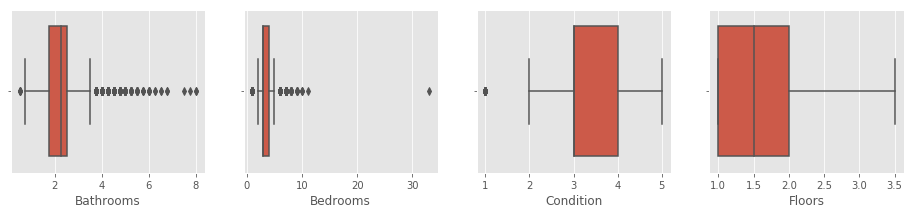

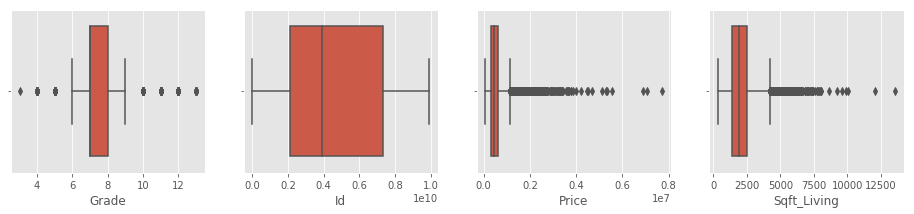

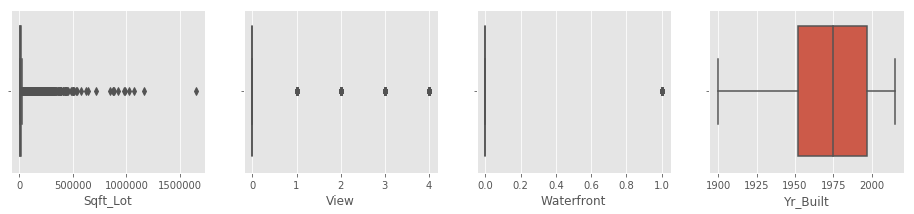

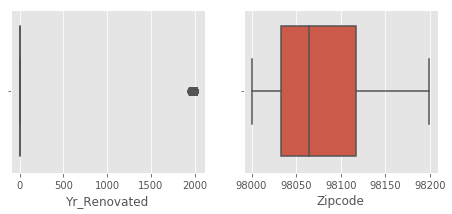

In [12]:
# Creating boxplots to help us eliminate more outliers 
plt.figure(figsize=(16, 3))
plt.subplot(141), sns.boxplot(df.Bathrooms)
plt.subplot(142), sns.boxplot(df.Bedrooms)
plt.subplot(143), sns.boxplot(df.Condition)
plt.subplot(144), sns.boxplot(df.Floors)
plt.figure(figsize=(16, 3))
plt.subplot(141), sns.boxplot(df.Grade)
plt.subplot(142), sns.boxplot(df.Id)
plt.subplot(143), sns.boxplot(df.Price)
plt.subplot(144), sns.boxplot(df.Sqft_Living)
plt.figure(figsize=(16, 3))
plt.subplot(141), sns.boxplot(df.Sqft_Lot)
plt.subplot(142), sns.boxplot(df.View)
plt.subplot(143), sns.boxplot(df.Waterfront)
plt.subplot(144), sns.boxplot(df.Yr_Built)
plt.figure(figsize=(16, 3))
plt.subplot(141), sns.boxplot(df.Yr_Renovated)
plt.subplot(142), sns.boxplot(df.Zipcode)
plt.show()

>> **As suspected, a couple of our variables have outliers.** Before we move on, let's get rid of the more obvious, drastic rows and see how much our DataFrame has been reduced.

In [13]:
before = len(df)
print("Number of rows in our DataFrame:", before)

# Removing outliers from DataFrame
df = df[df.Bathrooms<5]
df = df[df.Bedrooms<8]
df = df[df.Price<2000000]
df = df[df.Sqft_Living<5000]
df = df[df.Sqft_Lot<30000]
df = df[df.Sqft_Lot>1300]

print("Number of rows with outliers (to be dropped):", before - len(df))
print("Updated number of rows in our DataFrame:", len(df), "\n")

# Seeing our reduced DataFrame's descriptive stats and preview
display(df.info(), 
        pd.DataFrame(data = df.nunique().sort_values(), columns=['Counts']).transpose(),
        df.describe(), 
        df)

Number of rows in our DataFrame: 21427
Number of rows with outliers (to be dropped): 2584
Updated number of rows in our DataFrame: 18843 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18843 entries, 0 to 21595
Data columns (total 15 columns):
Id              18843 non-null int64
Date            18843 non-null datetime64[ns]
Price           18843 non-null float64
Bedrooms        18843 non-null int64
Bathrooms       18843 non-null float64
Sqft_Living     18843 non-null int64
Sqft_Lot        18843 non-null int64
Floors          18843 non-null float64
Waterfront      18843 non-null int32
View            18843 non-null int32
Condition       18843 non-null int64
Grade           18843 non-null int64
Yr_Built        18843 non-null int64
Yr_Renovated    18843 non-null int32
Zipcode         18843 non-null int64
dtypes: datetime64[ns](1), float64(3), int32(3), int64(8)
memory usage: 2.1 MB


None

,Waterfront,View,Condition,Floors,Bedrooms,Grade,Bathrooms,Yr_Renovated,Zipcode,Yr_Built,Date,Sqft_Living,Price,Sqft_Lot,Id
Counts,2,5,5,6,7,11,18,69,70,116,368,812,3350,7933,18673


,Id,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Yr_Built,Yr_Renovated,Zipcode
count,1.884300e+04,1.884300e+04,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000
mean,4.708198e+09,5.073174e+05,3.362628,2.058749,2000.571459,8107.668789,1.453670,0.004139,0.204851,3.423765,7.552354,1969.100037,67.800350,98079.371013
std,2.862512e+09,2.792203e+05,0.872487,0.725174,786.356224,4482.297154,0.512737,0.064207,0.708317,0.657085,1.083478,29.501772,361.609122,54.502524
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1301.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000
25%,2.260000e+09,3.120000e+05,3.000000,1.500000,1420.000000,5043.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1950.000000,0.000000,98033.000000
50%,4.046600e+09,4.399500e+05,3.000000,2.000000,1880.000000,7381.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1969.000000,0.000000,98065.000000
75%,7.454000e+09,6.250000e+05,4.000000,2.500000,2460.000000,9720.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1994.000000,0.000000,98118.000000
max,9.900000e+09,1.990000e+06,7.000000,4.750000,4980.000000,29982.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000


,Id,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Yr_Built,Yr_Renovated,Zipcode
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1995,0,98003
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1963,0,98198
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1960,0,98146
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,2003,0,98038
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1965,0,98007


<a name="chapter4"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬** 

[( Top of Page )](#chapter0) &nbsp;&nbsp; [( 1 )](#chapter1) &nbsp;&nbsp; [( 2 )](#chapter2) &nbsp;&nbsp; [( Previous -- 3. Cleaning and Scrubbing Data )](#chapter3) 

## 4. Data Exploring and Feature Engineering

[( Next -- 5. Predictive Data Modeling )](#chapter5) &nbsp;&nbsp; [( 6 )](#chapter6) &nbsp;&nbsp; [( 7 )](#chapter7)

### ***`Objective: To transform raw data into meaningful attributes of the phenomenon being observed`***
### ***`in a visual manner in the interset to directly address the underlying problem.`***

> ### 4.1 Visualizing our data.
>> **Let's create a range of plots including histograms, scatter plots, and heatmaps to quickly identify obvious trends in the data.** This can help highlight the patterns, relations, variance, and bias of available our data.

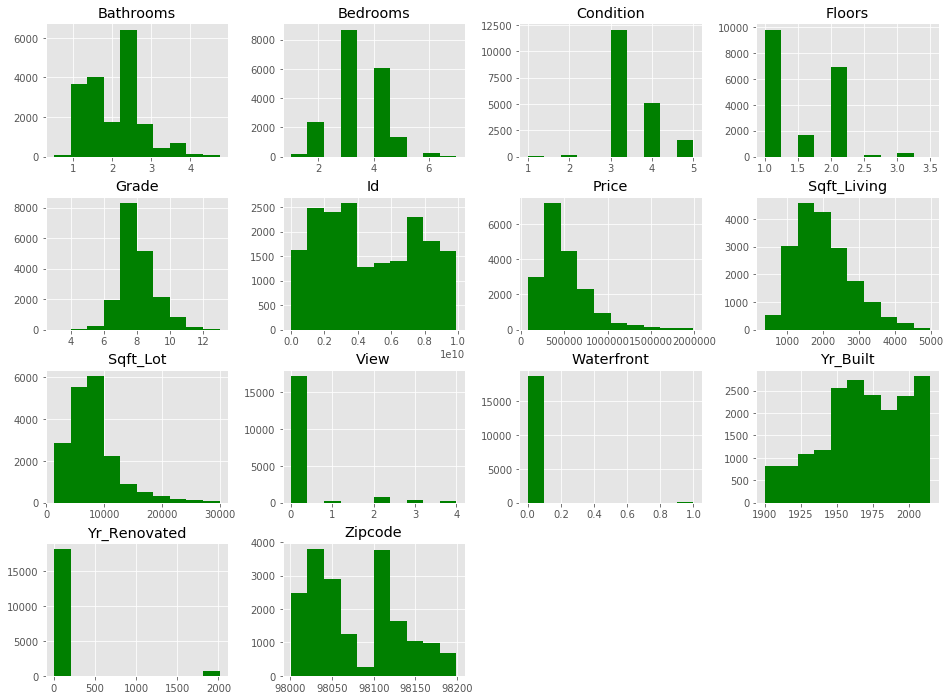

In [14]:
# Creating histograms for all numerical variables, checking for our normality assumption
df.hist(figsize=(16, 12), color='g')
plt.show()

>> **Our initial histograms visualization.** The "Central Limit Theorem" states when a large number of independent random variables, irrespective of the original distribution of these variables, their normalized sum tends towards a Gaussian distribution. So we will need to standardize our variables by transforming them to a comparible scale as such:
* Log transformations -- "Bedrooms", "Price", "Sqft_Living", "Sqft_Lot"
* As is -- "Bathrooms", "Condition", "Floors", "Id", "Grade", "View", "Waterfront", "Yr_Renovated"
* Squared root transformations -- "Yr-Built", "Zipcode"

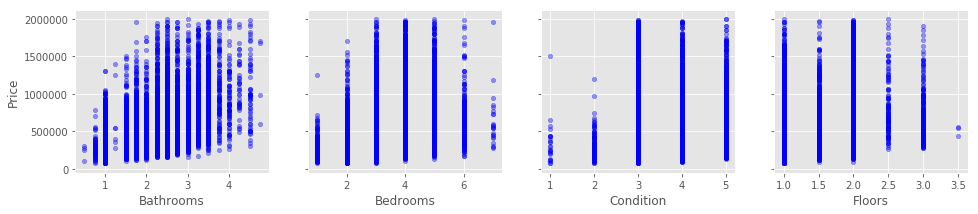

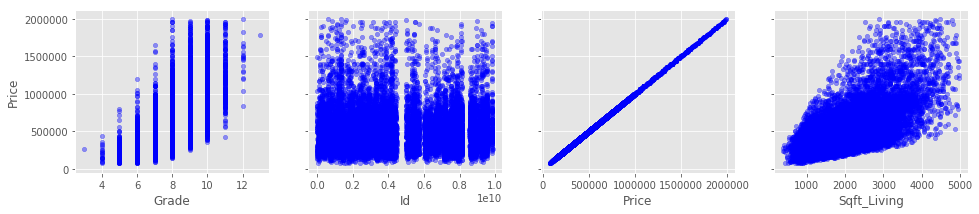

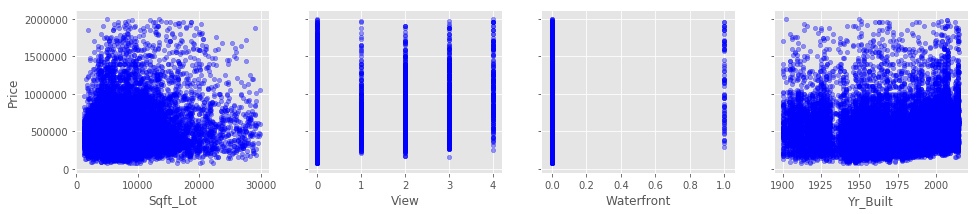

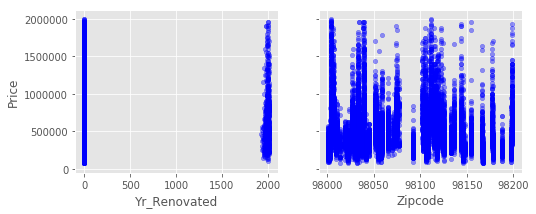

In [15]:
# Creating scatterplots to check for our linearity and heteroscedasticity assumptions against our target "Price" variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3), sharey=True)
for xcol, ax in zip(["Bathrooms", "Bedrooms", "Condition", "Floors"], axes):
    df.plot(kind='scatter', x=xcol, y="Price", ax=ax, alpha=0.4, color='b')
fig2, axes2 = plt.subplots(nrows=1, ncols=4, figsize=(16, 3), sharey=True)
for xcol, ax in zip(["Grade", "Id", "Price", "Sqft_Living"], axes2):
    df.plot(kind='scatter', x=xcol, y="Price", ax=ax, alpha=0.4, color='b')
fig3, axes3 = plt.subplots(nrows=1, ncols=4, figsize=(16, 3), sharey=True)
for xcol, ax in zip(["Sqft_Lot", "View", "Waterfront", "Yr_Built"], axes3):
    df.plot(kind='scatter', x=xcol, y="Price", ax=ax, alpha=0.4, color='b')
fig4, axes4 = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
for xcol, ax in zip(["Yr_Renovated", "Zipcode"], axes4):
    df.plot(kind='scatter', x=xcol, y="Price", ax=ax, alpha=0.4, color='b')
plt.show()

>> **Our initial scatterplots visualization.** The linearity assumption requires variables to be normally distributed for concluding some sort of statistical significance. It also requires that the calculated error values (residuals) also follow a normal distribution to produce unbiased estimates with the minimum variance. Positive linear relationships are noticeable and heteroscedasticity and other non-random patterns aren't too obvious (we'll further investigate that later). We will need to standardize our target/predictors as such:
* Continuous numerical variables: "Price", "Sqft_Living", "Sqft_Lot"
* Discrete numerical variables: "Bedrooms", "Bathrooms", "Condition", "Floors, "Grade", "Id", "View", "Waterfront", "Yr-Built", "Yr-Renovated", "Zipcode"

,Id,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Yr_Built,Yr_Renovated,Zipcode
Id,True,False,False,False,False,False,False,False,False,False,False,False,False
Bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
Bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
Sqft_Living,False,False,False,True,False,False,False,False,False,False,False,False,False
Sqft_Lot,False,False,False,False,True,False,False,False,False,False,False,False,False
Floors,False,False,False,False,False,True,False,False,False,False,False,False,False
Waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False
View,False,False,False,False,False,False,False,True,False,False,False,False,False
Condition,False,False,False,False,False,False,False,False,True,False,False,False,False
Grade,False,False,False,False,False,False,False,False,False,True,False,False,False


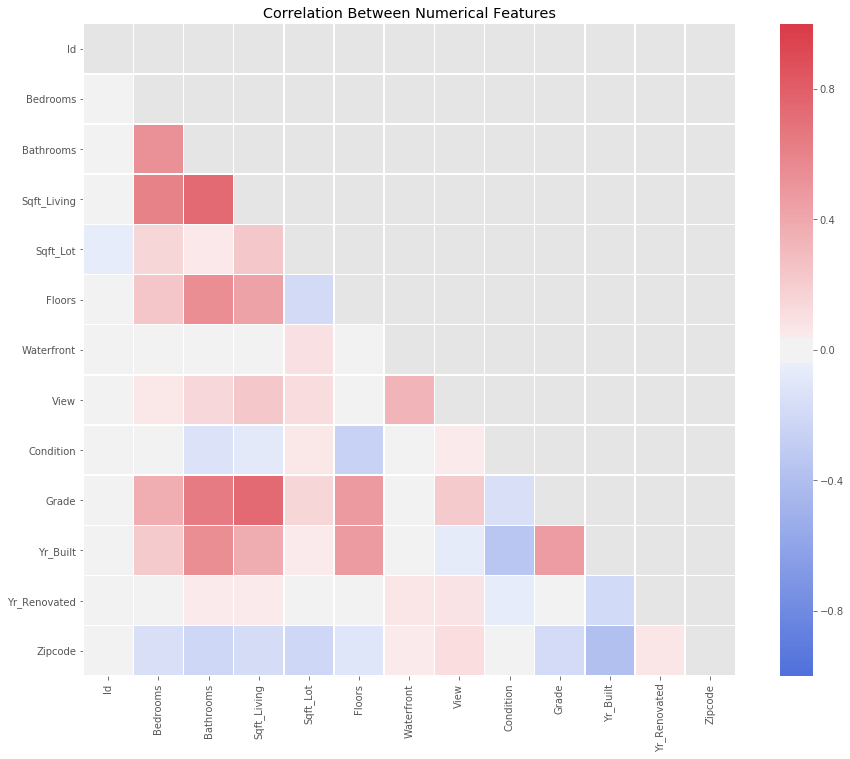

In [16]:
# Creating a corrolation matrix to check for multicollinearity among our predictors
plt.figure(figsize=(16, 12))
corr = df.drop("Price", axis=1).corr() # Computing the correlation matrix where "Date" won't be included
mask = np.zeros_like(corr, dtype=np.bool) # Masking the symmetric upper triangle at the diagonal to reduce clutter
mask[np.triu_indices_from(mask)]=True

# Converting above's matrix into a heatmap to be able to see our corrolations among a large number of variables at a glance
cmap = sns.diverging_palette(h_neg=260, h_pos=10, as_cmap=True)
sns.heatmap(corr, mask=mask, center=0, vmax=1, vmin=-1, square=True, linewidths=.5, cmap=cmap)
plt.title("Correlation Between Numerical Features")

# Giving us a Boolean output if the pairwise corrolations are high
display(abs(corr)>0.75)

>> **Our initial heatmap visualization.** None of our variables have a high pairwise corrolation (>0.75), which means that we could continue on without having to worry about multicollinearity.
> ### 4.2 Other visualizations for comparisons.
>> **Does renovating the house or the time of year affect price?** These variables don't need to be standardized so let's take a closer look at them. <br><br>
>> **We can see that some houses have been sold multiple times, so let's assume that some were renovated first.** First let's count how many houses have been sold, and how many times. Then from those houses, if a house has been sold more than once, let's compare the possible "Price"/"Sqft_Living" and "Price"/"Sqft_Lot" changes from the first "Date" sold to the most recent.

Number of houses sold once: 18504
Number of houses sold twice: 168
Number of houses sold thrice: 1
Total number of houses sold (rows in our DataFrame): 18843 

Average living square footage percent change between the first and latest date sold: 0 %
Average lot square footage percent change between the first and latest date sold: 0 %


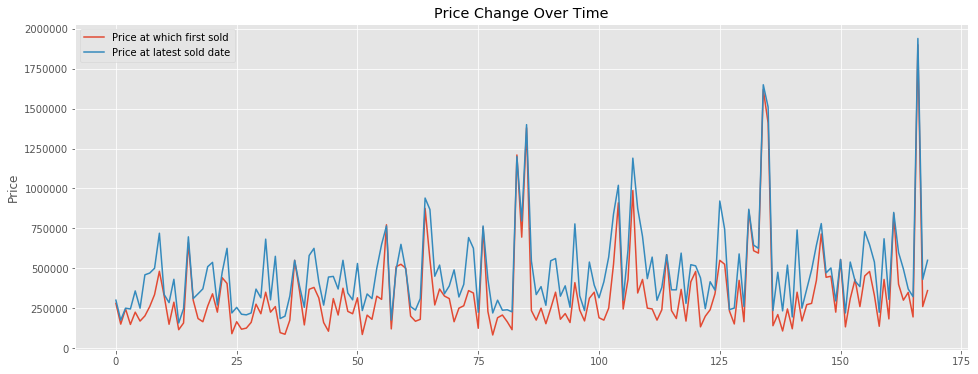

Average price percent change between the first and latest date sold: 29 %


In [17]:
# Counting how many houses of the same "Id" have been sold
Id_Counts = df.Id.value_counts()

once = sum(1 for times_sold in Id_Counts if times_sold == 1)
twice = sum(1 for times_sold in Id_Counts if times_sold == 2)
thrice = sum(1 for times_sold in Id_Counts if times_sold == 3)

if (once + (twice * 2) + (thrice * 3)) == len(df):
    print("Number of houses sold once:", once)
    print("Number of houses sold twice:", twice)
    print("Number of houses sold thrice:", thrice)
    print("Total number of houses sold (rows in our DataFrame):", len(df), "\n")
else:
    print("The DataFrame has missing values.", "\n")

# Investigating for renovation; i.e., if the area of the house changed between the first and latest date sold
dup = df[df.Id.duplicated(keep=False)]

living = dup.groupby("Id")["Sqft_Living"]
lot = dup.groupby("Id")["Sqft_Lot"]
print("Average living square footage percent change between the first and latest date sold:", round((1 - (living.first().mean() / living.last().mean())) * 100), "%")
print("Average lot square footage percent change between the first and latest date sold:", round((1 - (lot.first().mean() / lot.last().mean())) * 100), "%")

#Creating a lineplot to compare how the price has changed
prices = dup.groupby("Id")["Price"]
      
plt.figure(figsize=(16, 6))
sns.lineplot(range(len(prices)), prices.first(), label="Price at which first sold")
sns.lineplot(range(len(prices)), prices.last(), label="Price at latest sold date")
plt.title("Price Change Over Time")
plt.legend(), plt.show()

print("Average price percent change between the first and latest date sold:", round((1 - (prices.first().mean() / prices.last().mean())) * 100), "%")

>> **Interestingly, the houses that were sold multiple times did not have any changes in the living or lot square footage.** We can imagine that this may be because King County in New York is an urban area, so there isn't much space to begin with. If a house was renovated, there may not have been any walls added or knocked down. It could have been smaller projects such as replacing the kitchen countertop or replacing a room's carpet with tile or replacing a bathroom's cabinets, etc. Or it could have just been time to update an old house! Additionally, inflation over time usually does bring the cost of a house up. <br><br>
>> **Using our datetime type variable to see if the time of year affects the price.** Do people sell more houses in the summer or on the weekends because of buyers generally having more time out of the house during those time spans?

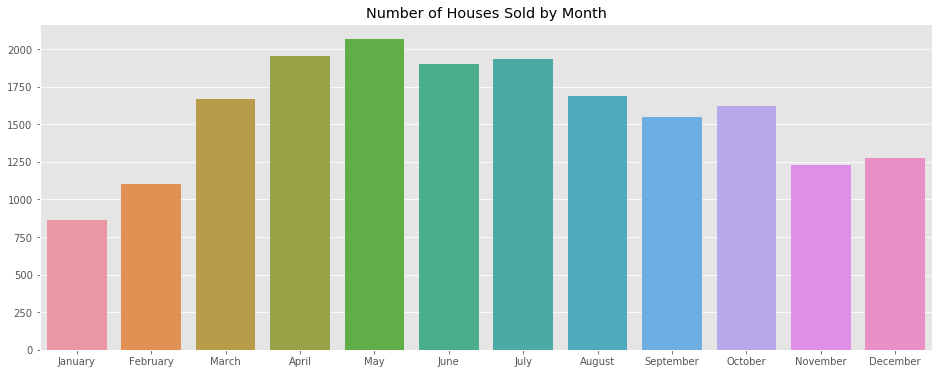

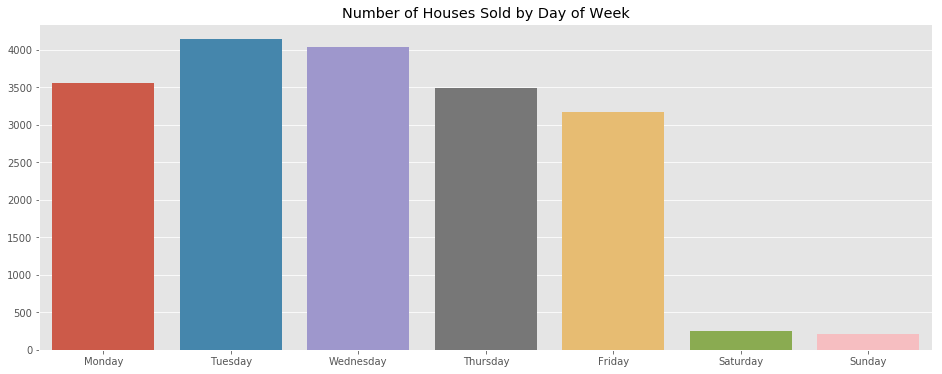

In [18]:
# Investigating the best month to sell a house
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_sales = []

for i in range(1, 13):
    monthly_sales.append(sum(df.Date.dt.month == i)) # Between 1 and 12 inclusive
    
plt.figure(figsize=(16, 6))
sns.barplot(months, monthly_sales)
plt.title("Number of Houses Sold by Month")
plt.show()

# Investigating the best weekday to sell a house
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales = []

for i in range(0, 7): 
    daily_sales.append(sum(df.Date.dt.dayofweek == i)) # Monday is 0 and Sunday is 6
    
plt.figure(figsize=(16, 6))
sns.barplot(days, daily_sales)
plt.title("Number of Houses Sold by Day of Week")
plt.show()

>> **We can see that people tend to sell more during warmer months and during the weekday more than the weekend.** Surprisingly, not as many people sell during the weekends when buyers are more likely free. Maybe both sellers and buyers would rather spend their free time doing other things, or the weekday is more popular since those are business hours. <br><br>
>> **We can reorganize our DataFrame a little more again.** At this point, we no longer have any need for the "Date" or the "Yr_Renovated" features as we've shown a comparison of how the price has changed over time and is only a small portion of our data. So let's drop these columns. Then let's set the "Id" column as our index.

In [19]:
df.drop(["Date", "Yr_Renovated"], axis=1, inplace=True) 

df.set_index("Id", inplace=True)

#Seeing our reduced DataFrame's descriptive stats and preview
display(df.info(), 
        pd.DataFrame(data = df.nunique().sort_values(), columns=['Counts']).transpose(),
        df.describe(), 
        df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18843 entries, 7129300520 to 291310100
Data columns (total 12 columns):
Price          18843 non-null float64
Bedrooms       18843 non-null int64
Bathrooms      18843 non-null float64
Sqft_Living    18843 non-null int64
Sqft_Lot       18843 non-null int64
Floors         18843 non-null float64
Waterfront     18843 non-null int32
View           18843 non-null int32
Condition      18843 non-null int64
Grade          18843 non-null int64
Yr_Built       18843 non-null int64
Zipcode        18843 non-null int64
dtypes: float64(3), int32(2), int64(7)
memory usage: 1.7 MB


None

,Waterfront,View,Condition,Floors,Bedrooms,Grade,Bathrooms,Zipcode,Yr_Built,Sqft_Living,Price,Sqft_Lot
Counts,2,5,5,6,7,11,18,70,116,812,3350,7933


,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Yr_Built,Zipcode
count,1.884300e+04,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000,18843.000000
mean,5.073174e+05,3.362628,2.058749,2000.571459,8107.668789,1.453670,0.004139,0.204851,3.423765,7.552354,1969.100037,98079.371013
std,2.792203e+05,0.872487,0.725174,786.356224,4482.297154,0.512737,0.064207,0.708317,0.657085,1.083478,29.501772,54.502524
min,7.800000e+04,1.000000,0.500000,370.000000,1301.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000
25%,3.120000e+05,3.000000,1.500000,1420.000000,5043.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1950.000000,98033.000000
50%,4.399500e+05,3.000000,2.000000,1880.000000,7381.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1969.000000,98065.000000
75%,6.250000e+05,4.000000,2.500000,2460.000000,9720.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1994.000000,98118.000000
max,1.990000e+06,7.000000,4.750000,4980.000000,29982.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,98199.000000


,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Yr_Built,Zipcode
Id,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074
1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1995,98003
2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1963,98198
2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1960,98146
3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,2003,98038


>> **We are at the point where we have a good DataFrame for doing a predicting a model to solve our problem.** Combining all of the observations from above visualizations, we can break down we want to further investigate our remaining variables for our predictive model as such:
* Keeping as continuous/numerical features: "Price", "Sqft_Living", "Sqft_Lot"
* Making as discrete/categorical features: "Bathrooms", "Bedrooms", "Condition", "Floors", "Grade", "View", "Waterfront", "Yr-Built", "Zipcode"
> ### 4.3 Normalizing, scaling, and transforming our data.
>> **Standardizing our continuous distributions allow us to compare a number of observations which may belong to different normal distributions having distinct means and standard deviations.** By giving them an appropriate relative weighing properties,  predictors with larger values don't automatically have a larger impact on our target and predictions. <br><br>
>> **Technically, Ordinary Least Squares (OLS) works fine for non-normal data distributions in the context of prediction.** But in this case, let's do it since we can further do hypotheses testing on the parameter estimates after all is said and done.

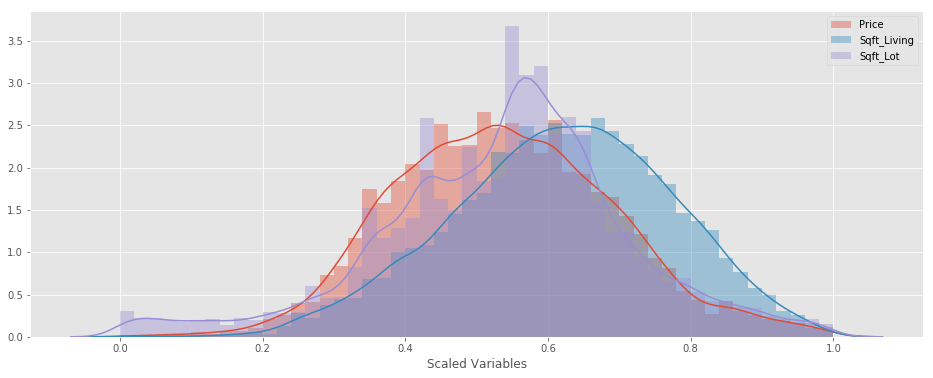

(<matplotlib.legend.Legend at 0x180af19e6a0>, None)

In [20]:
# Normalizing our data by performing logariphmic transformations
log_price = np.log(df.Price)
log_sqft_living = np.log(df.Sqft_Living)
log_sqft_lot = np.log(df.Sqft_Lot)

# Transforming our data by min/max scaling to manage the difference in magnitutes
scaled_price = (log_price - min(log_price)) / (max(log_price) - min(log_price))
scaled_sqft_living = (log_sqft_living - min(log_sqft_living)) / (max(log_sqft_living) - min(log_sqft_living))
scaled_sqft_lot = (log_sqft_lot - min(log_sqft_lot)) / (max(log_sqft_lot) - min(log_sqft_lot))

# Updating our DataFrame with the the transformed variables
df.Price = scaled_price
df.Sqft_Living = scaled_sqft_living
df.Sqft_Lot = scaled_sqft_lot

# Displaying our transformed variables
plt.figure(figsize=(16, 6))
sns.distplot(scaled_price, label="Price")
sns.distplot(scaled_sqft_living, label="Sqft_Living")
sns.distplot(scaled_sqft_lot, label="Sqft_Lot")
plt.xlabel("Scaled Variables")
plt.legend(), plt.show()

> ### 4.4 Dealing with the rest of the categorical features.
>> **We need undergo on-hot encoding to create dummy variables.** The advantage of using dummies is that, whatever algorithm is being used, numerical values cannot be misinterpreted as being continuous, so they enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation. StatsModel is weird about passing categories through it, so it will automatically change those variables' type to uint8, and which ultimately will not affect our overall testing.

In [21]:
# Turning our variables into catagories
df.Bathrooms = df.Bathrooms.astype('int').astype('category')
df.Bedrooms = df.Bedrooms.astype('category')
df.Condition = df.Condition.astype('category')
df.Grade = df.Grade.astype('category')
df.Floors = df.Floors.astype('category')
df.View = df.View.astype('category')
df.Waterfront = df.Waterfront.astype('category')
df.Yr_Built = df.Yr_Built.astype('category')
df.Zipcode = df.Zipcode.astype('category')

# Making dummies
dummy_bathrooms = pd.get_dummies(df.Bathrooms, prefix="bathrooms", drop_first=True)
dummy_bedrooms = pd.get_dummies(df.Bedrooms, prefix="bedrooms", drop_first=True)
dummy_condition = pd.get_dummies(df.Condition, prefix="condition", drop_first=True)
dummy_floors = pd.get_dummies(df.Floors, prefix="floors", drop_first=True)
dummy_grade = pd.get_dummies(df.Grade, prefix="grade", drop_first=True)
dummy_view = pd.get_dummies(df.View, prefix="view", drop_first=True)
dummy_waterfront = pd.get_dummies(df.Waterfront, prefix="waterfront", drop_first=True)
dummy_yr_built = pd.get_dummies(df.Yr_Built, prefix="yr_built", drop_first=True)
dummy_zipcode = pd.get_dummies(df.Zipcode, prefix="zipcode", drop_first=True)

# Adding dummies to our DataFrame and removing the original features
df = df.join([dummy_bathrooms, dummy_bedrooms, dummy_condition, dummy_floors, dummy_grade, dummy_view, dummy_waterfront, dummy_yr_built, dummy_zipcode])
df.drop(["Bathrooms", "Bedrooms", "Condition", "Floors", "Grade", "View", "Waterfront", "Yr_Built", "Zipcode"], axis=1, inplace=True)

# Seeing our expanded DataFrame's descriptive stats and preview
display(df.info(), 
        pd.DataFrame(data = df.nunique().sort_values(), columns=['Counts']).transpose(),
        df.describe(), 
        df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249585 entries, 1000102 to 9900000190
Columns: 221 entries, Price to zipcode_98199
dtypes: float64(3), uint8(218)
memory usage: 59.5 MB


None

,yr_built_1974,yr_built_2004,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,...,yr_built_1939,yr_built_1940,yr_built_1941,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1933,Sqft_Living,Price,Sqft_Lot
Counts,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,812,3350,7933


,Price,Sqft_Living,Sqft_Lot,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,...,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000,249585.000000
mean,0.395419,0.530646,0.549431,0.656382,0.282485,0.043781,0.013018,0.099501,0.631669,0.151199,...,0.029793,0.004319,0.018098,0.017341,0.249887,0.005044,0.017417,0.004624,0.021552,0.005265
std,0.204944,0.148799,0.136914,0.474917,0.450209,0.204607,0.113350,0.299334,0.482353,0.358243,...,0.170017,0.065578,0.133306,0.130538,0.432948,0.070845,0.130819,0.067840,0.145215,0.072367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215961,0.412055,0.500228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.382196,0.511880,0.521197,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.547157,0.635375,0.623283,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Price,Sqft_Living,Sqft_Lot,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
Id,,,,,,,,,,,,,,,,,,,,,
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000102,0.394569,0.719211,0.629394,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a name="chapter5"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬**

[( Top of Page )](#chapter0) &nbsp;&nbsp; [( 1 )](#chapter1) &nbsp;&nbsp; [( 2 )](#chapter2) &nbsp;&nbsp; [( 3 )](#chapter3) &nbsp;&nbsp; [( Previous -- 4. Exploring and Feature Engineering )](#chapter4) 

## 5. Predictive Data Modeling

[( Next -- 6. Supporting the Intepreted Model )](#chapter6) &nbsp;&nbsp; [( 7 )](#chapter7)

### ***`Objective: To train machine learning models, evaluate their performance, and use them to make`***
### ***`predictions.`***

> ### 5.1 Building a full multiple linear regression.
>> **We can use StatsModels and SkLearn to help us predict a model.** StatModel's OLS function gives us a summary report our model, and Skikit-Learn's built-in functions help us run OLS for the linear regression without statistical metrics of the parameter estimates readily available.
>>> **Note:** StatsModels' <em>sm.OLS()</em> class does not add the intercept term automatically, and thus calls for us to create a constant term as an intercept to our model if we were to run a regression analysis with this package. On the other hand, SkLearn's <em>LinearRegression()</em> class does automatically adds an intercept term to our model. 
>> <p> <strong>We need to choose an appropriate test size of our sample in order to to account for any particularly good/bad models that might have might have resulted from poor/good splits in the data.</strong> Training a model on before or after a certain test size percentage of the data is apt to lead to underfitting or overfitting, and thus can bring our MSE average up. Let's build our functions to help us perform a full multiple linear regression. </p>

In [22]:
# Running a train-test-split model validation to see an appropriate training test size
def test_size(X, y):
    
    y = pd.DataFrame(y) # DataFrame can be thought as a dictionary-like container for Series objects
    random.seed(123) # Seed for reproducibility
    train_err = []
    test_err = []
    t_sizes = list(range(5, 100, 5)) # Generating 18 different sizes of test (percentage) samples
    linreg = LinearRegression()
    for t_size in t_sizes: # Going through each of the 18 different sizes between 5 and 95, inclusive
        temp_train_err = []
        temp_test_err = []
        for model in range(100): # Performing the model 100 times in each t_size
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(t_size / 100))
            linreg.fit(X_train, y_train) # Fitting the model to the train data
            y_hat_train = linreg.predict(X_train) # Calculating predictions
            y_hat_test = linreg.predict(X_test) # y_pred
            temp_train_err.append(mean_squared_error(y_train, y_hat_train)) # Calculating the MSE
            temp_test_err .append(mean_squared_error(y_test, y_hat_test))
        train_err.append(np.mean(temp_train_err))
        test_err.append(np.mean(temp_test_err))   
    
    # Outputting the average errors of 100 iterations of a random selected sample of 200 houses
    print("Average Test MSE on 100 Models", round(np.sum(test_err) / len(test_err), 5))
    print("Average Train MSE on 100 Models", round(np.sum(train_err) / len(train_err), 5))

    # Visualizing the MSE averages of 100 iterations of a random selected sample of 200 houses
    plt.figure(figsize=(16, 6))
    plt.scatter(t_sizes, train_err, label="Training error")
    plt.scatter(t_sizes, test_err, label="Testing error")
    plt.title("Train-Test-Split Average on 100 Models"), plt.xlabel("Test size % (5 to 95, by 5)"), plt.ylabel("Average MSE")
    plt.legend(), plt.show()

# Searching for an optimal value of K folds for our cross validation
def cross_validation(X, y):    
    
    y = pd.DataFrame(y) # DataFrame can be thought as a dictionary-like container for Series objects
    random.seed(123) # Seed for reproducibility 
    
    k_range = range(1, 31) 
    k_scores = [] 
    for k in k_range:       
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())

    plt.plot(k_range, k_scores)
    plt.xlabel("Value of K for KNN"), plt.ylabel("Cross-validated accuracy")
    plt.show()
    
# Running a train-test-split model validation on 1 sample
def linear_regression(X, y, t_size=.2, cv=10): # Default test numbers
    
    if t_size > 1:
        return "Change your test size to a decimal (percentage)!"
    elif t_size == 0:
        return "Add a test size as a decimal (percentage)!"
    else: 
        y = pd.Series(y) # Series is the datastructure for a single column of a DataFrame
        random.seed(123) # Seed for reproducibility
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size)
        linreg = LinearRegression()
        linreg.fit(X_train, y_train) #Fitting the model to the train data
        y_hat_train = linreg.predict(X_train) #Calculating predictions
        y_hat_test = linreg.predict(X_test) #y_pred
        score = cross_val_score(linreg, X, y, cv=cv, scoring='r2') #adjusted R-squared/neg_mean_squared_error

        # Outputting errors    
        print("R-squared score:", round(linreg.score(X, y), 2))
        print("Test root mean absolute error:", round(np.sqrt(mean_squared_error(y_test, y_hat_test)), 5))
        print("Train root mean absolute error:", round(np.sqrt(mean_squared_error(y_test, y_hat_test)), 5))
        print("------------------------------------------------------------")
        print("Average predicted price:", round(y_hat_test.mean(), 5))
        print("Average actual price", round(y_test.mean(), 5)) 
        print("Model accuracy with {cv} folds of cross validations and a {t_size} test size:".format(cv=cv, t_size=t_size), round(score.mean(), 3) * 100, "%")
    
        # Visualizing the prices a random selected sample of 200 houses
        plt.figure(figsize=(16, 6))
        sns.lineplot(range(len(y_hat_test[:200])), y_hat_test[:200], label="Predicted prices")
        sns.lineplot(range(len(y_hat_test[:200])), y_test[:200], label="Actual prices")
        plt.title("Comparing predicted price vs actual price"), plt.xlabel("House"), plt.ylabel("Prices")
        plt.legend(), plt.show()
        
        # Outputing regression summary
        model = ols(formula='y ~ X', data=df).fit()
        display(model.summary())
        
    return (linreg, y_hat_test, y_test)

# Choosing more weighted, robust predictors in our model via recursive feature elimination
def RFE_selection(X, y):
    est = sm.OLS(y, sm.add_constant(X)).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=["p"])
    features = list(pvalues[pvalues.p<.005].index) # 99% confidence interval
    return features

# Choosing more weighted, robust predictors in our model via forward stepwise selection
def FS_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """ Perform a forward-backward feature selection based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping
    """
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print("Add {:30} with p-value {:.6}".format(best_feature, best_pval))
        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:] # Use all coefficients except intercept
        worst_pval = pvalues.max() # Null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print("Drop {:30} with p-value {:.6}".format(worst_feature, worst_pval))
        if not changed:
            break
    return included # Returning a model that keeps continuous variables in

> ### 5.2 Performing a full multiple linear regression.
>> **The problem with train-test-split is how the random samples of the data was created/split into training and the test set, strongly influencing the MSE.** Even with my test_size function to help prevent underfitting/overfitting, our DataFrame is way too large for any computer to process it reasonably. I did not even try to run it here because I knew it would take forever for it to reiterate through the 100 times. So for the time being, let's just use the default test size (t_size=.2). We'll also keep our cv folds low for our bias-variance trade off (i.e., low bias, high variance). 

R-squared score: 0.88
Test root mean absolute error: 0.07226
Train root mean absolute error: 0.07226
------------------------------------------------------------
Average predicted price: 0.39522
Average actual price 0.39586
Model accuracy with 6 folds of cross validations and a 0.2 test size: -5.347115145732844e+19 %


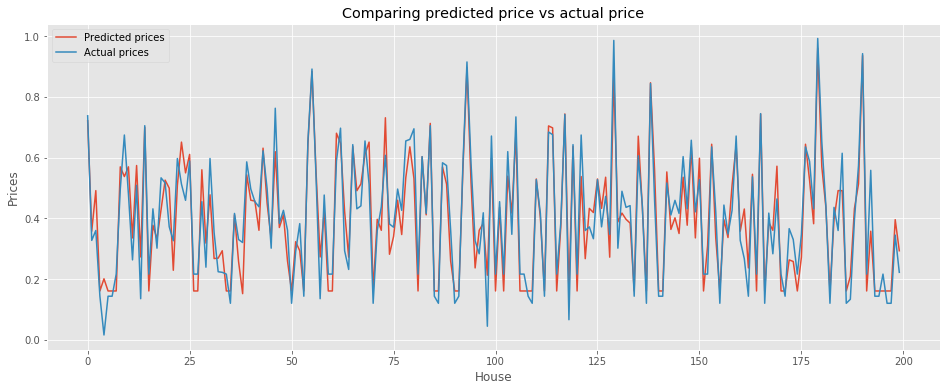

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     8006.
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:09:09   Log-Likelihood:             3.0194e+05
No. Observations:              249585   AIC:                        -6.034e+05
Df Residuals:                  249364   BIC:                        -6.011e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1614      0.074      2.187      0.029       0.017       0.306
X[0]           0.3416      0.004     85.324      0.000       0.334       0.349
X[1]           0.0772      0.003     28.578      0.000       0.072       0.082
X[2]           0.0613      0.004     14.432      0.000       0.053       0.070
X[3]           0.0533      0.004     12.157      0.000       0.045       0.062
X[4]           0.0404      0.005      8.756      0.000       0.031       0.049
X[5]           0.0734      0.005     15.156      0.000       0.064       0.083
X[6]          -0.0171      0.002     -8.381      0.000      -0.021      -0.013
X[7]          -0.0570      0.002    -29.109      0.000      -0.061      -0.053
X[8]          -0.0475      0.002    -21.678      0.000      -0.052      -0.043
X[9]          -0.0293      0.002    -13.137      0.000      -0.034      -0.025
X[10]         -0.0888      0.003    -33.167      0.000      -0.094      -0.084
X[11]         -0.0821      0.015     -5.375      0.000      -0.112      -0.052
X[12]          0.0055      0.012      0.477      0.633      -0.017       0.028
X[13]          0.0565      0.011      5.016      0.000       0.034       0.079
X[14]          0.0609      0.011      5.396      0.000       0.039       0.083
X[15]          0.0697      0.011      6.161      0.000       0.048       0.092
X[16]         -0.0119      0.001    -10.994      0.000      -0.014      -0.010
X[17]         -0.0061      0.001     -5.504      0.000      -0.008      -0.004
X[18]          0.0038      0.007      0.555      0.579      -0.010       0.017
X[19]         -0.0723      0.003    -21.434      0.000      -0.079      -0.066
X[20]         -0.0290      0.042     -0.692      0.489      -0.111       0.053
X[21]         -0.1861      0.074     -2.501      0.012      -0.332      -0.040
X[22]         -0.1985      0.073     -2.722      0.006      -0.341      -0.056
X[23]         -0.1780      0.073     -2.442      0.015      -0.321      -0.035
X[24]         -0.1351      0.073     -1.854      0.064      -0.278       0.008
X[25]         -0.1034      0.073     -1.418      0.156      -0.246       0.040
X[26]         -0.0482      0.073     -0.661      0.508      -0.191       0.095
X[27]         -0.0178      0.073     -0.244      0.807      -0.161       0.125
X[28]          0.0283      0.073      0.387      0.699      -0.115       0.171
X[29]         -0.0229      0.073     -0.313      0.754      -0.166       0.120
X[30]          0.2807      0.103      2.734      0.006       0.079       0.482
X[31]          0.0646      0.003     19.028      0.000       0.058       0.071
X[32]          0.0352      0.002     17.219      0.000       0.031       0.039
X[33]          0.0857      0.003     32.469      0.000       0.081       0.091
X[34]          0.1501      0.003     50.754      0.000       0.144       0.156
X[

In [23]:
# Separating our target and feature variables
X = df.drop(["Price"] , axis=1)
y = df.Price 

# Deciding our test and cv folds size to fit a linear regression model
#test_size(X, y)
#cross_validation(X, y)

# Performing our linear regression model
linreg, y_hat_test, y_test = linear_regression(X, y, cv=6)

> ### 5.3 Understanding our results.
>> **Our high R-squared makes for a good prediction, but our model accuracy is negative.** Because we have a lot of independent variables, R-squared is an arbitrary number that cannot verify whether the coefficient ballpark figure and its predictions are prejudiced. It also does not show if a regression model is satisfactory; it can show an R-squared figure for a good model or a high R-squared figure for a model that doesn’t fit.
>>> **In general we should look at the adjusted R-squared rather than R-squared, especially since we have a lot of columns in our DataFrame.** R-squared supposes that every independent variable in the model explains the variation in the dependent variable. It gives the percentage of explained variation as if all independent variables in the model affect the dependent variable. Adjusted R-squared, on the other hand, gives the percentage of variation explained by only those independent variables that in reality affect the dependent variable. This is were cross-validation comes in handy. 
>> <p> <strong>Cross-validation takes the train-test-split even further.</strong> So, in order to deal with the issues that random sampling can introduce into interpreting the quality of our models, cross-validation is great way to run multiple train-test splits on your data set to maximize the quality of your predictions for a given set of data. We can see our results of the model accuracy from our <em>linear_regression()</em> function. Since the adjusted R-squared is an additive model, it must be in the [0, 1] range. </p> <blockquote>
>> <strong>Our cross validation is a negative result, meaning our model prediction did not perform well on some of our random samples of data. Additionally, our OLS summary shows that the condition number is large, which suggests that there may be strong multicollinearity or other numerical problems.</strong> Feature selection might solve these problems by narrowing the number of features that have more weighted impact on our model and remove ones that can lead to noise and misdirection.</blockquote>

<a name="chapter6"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬** 

[( Top of Page )](#chapter0) &nbsp;&nbsp; [( 1 )](#chapter1) &nbsp;&nbsp; [( 2 )](#chapter2) &nbsp;&nbsp; [( 3 )](#chapter3) &nbsp;&nbsp; [( 4 )](#chapter4) &nbsp;&nbsp; [( Previous -- 5. Predictive Data Modeling )](#chapter5) 

## 6. Supporting the Intepreted Model

[( Next -- 7. Conclusion - Future Applications )](#chapter7)

### ***`Objective: To justify and balance the accuracy and computational cost of the analysis process.`***

>### 6.1 Feature selection
>> **Recursive feature elimination (RFE) vs forward selector.** Because a good number of our coefficeint estimates have a negative coefficient, RFE probably would give us the same results since RFE only looks to optimize the model's R-squared. So rather than choosing how many significant features I want in my model, maybe our model would be better predicted if we selected features by using the p-value parameter to add features (forward step), assigning a penalty to features in proportion to how much they reduce the p-value of the existing features in the model. The model stops adding features when the cost of adding (the penalty) is higher than the improvement in the model (backward step). But this could be troublesome in terms of computational power since I have so many columns.
>>> **Setting the alpha level.** A signficant test is when the alpha is set to 0.05, or p-value < 0.05.  Looking at the OLS Summary, since my R-squared and adjusted R-squared are the same, I know there are a good number of significant features. So let's choose a bigger alpha at 0.005 in order to filter the less weighted predictors out of our analysis. Doing so also gives us a higher confidence interval from 95% to 99%

In [24]:
# Selecting all features that have a p-value < 0.005
RFE_features = RFE_selection(X, y)

# Adding one feature at a time (starting with the highest p-value) and stopping when no more improvement is detected
#FS_features = FS_selection(X, y)

print("Number of features in our original predictive model:", len(X.columns))
print("Number of significant features in our recursive feature elimination model:", len(RFE_features))
#print("Number of significant features in our forward selector predictive model:", len(FS_features))

Number of features in our original predictive model: 220
Number of significant features in our recursive feature elimination model: 166


>### 6.2 Predicting and validating our model again.
>> **There are still a lot of feature columns in our model, but we know that we reduced that number to only the very significant ones whose addition to the model gave more improvement in the prediction rather than penalizing it.** Let's perform a new model predicting process again with the same test size and using only the recursive selected features. Then let's validate the model if it's an overall good fit for our data.

R-squared score: 0.87
Test root mean absolute error: 0.07364
Train root mean absolute error: 0.07364
------------------------------------------------------------
Average predicted price: 0.39706
Average actual price 0.39717
Model accuracy with 6 folds of cross validations and a 0.2 test size: 68.4 %


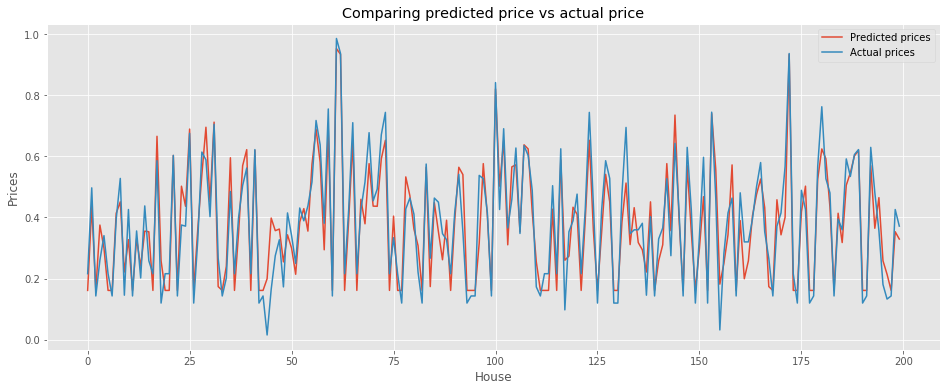

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:15:43   Log-Likelihood:             2.9773e+05
No. Observations:              249585   AIC:                        -5.951e+05
Df Residuals:                  249418   BIC:                        -5.934e+05
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0087      0.005      1.869      0.062      -0.000       0.018
X[0]           0.4967      0.003    154.910      0.000       0.490       0.503
X[1]           0.0882      0.002     35.418      0.000       0.083       0.093
X[2]           0.0020      0.004      0.531      0.595      -0.005       0.009
X[3]          -0.0092      0.004     -2.392      0.017      -0.017      -0.002
X[4]          -0.0093      0.004     -2.357      0.018      -0.017      -0.002
X[5]          -0.0010      0.004     -0.252      0.801      -0.009       0.007
X[6]        6.988e-05      0.002      0.035      0.972      -0.004       0.004
X[7]          -0.0579      0.002    -29.990      0.000      -0.062      -0.054
X[8]          -0.0499      0.002    -23.497      0.000      -0.054      -0.046
X[9]          -0.0476      0.002    -22.035      0.000      -0.052      -0.043
X[10]         -0.1084      0.002    -44.885      0.000      -0.113      -0.104
X[11]         -0.1042      0.015     -6.729      0.000      -0.135      -0.074
X[12]          0.0643      0.001     49.249      0.000       0.062       0.067
X[13]          0.0623      0.001     42.265      0.000       0.059       0.065
X[14]          0.0732      0.002     41.674      0.000       0.070       0.077
X[15]         -0.0156      0.001    -16.040      0.000      -0.018      -0.014
X[16]          0.0010      0.001      1.067      0.286      -0.001       0.003
X[17]         -0.0821      0.003    -26.991      0.000      -0.088      -0.076
X[18]          0.0763      0.003     22.347      0.000       0.070       0.083
X[19]          0.0477      0.002     23.325      0.000       0.044       0.052
X[20]          0.1084      0.002     52.115      0.000       0.104       0.113
X[21]          0.1639      0.003     62.396      0.000       0.159       0.169
X[22]          0.0997      0.009     11.430      0.000       0.083       0.117
X[23]         -0.0053      0.003     -2.010      0.044      -0.011      -0.000
X[24]         -0.0112      0.003     -3.402      0.001      -0.018      -0.005
X[25]         -0.0502      0.008     -6.196      0.000      -0.066      -0.034
X[26]         -0.0516      0.002    -25.414      0.000      -0.056      -0.048
X[27]         -0.0597      0.003    -17.256      0.000      -0.067      -0.053
X[28]         -0.1443      0.002    -61.514      0.000      -0.149      -0.140
X[29]         -0.0235      0.003     -8.085      0.000      -0.029      -0.018
X[30]         -0.0327      0.007     -4.662      0.000      -0.046      -0.019
X[31]         -0.0458      0.002    -24.787      0.000      -0.049      -0.042
X[32]         -0.1010      0.003    -32.847      0.000      -0.107      -0.095
X[33]         -0.0643      0.002    -27.585      0.000      -0.069      -0.060
X[34]         -0.0893      0.003    -33.864      0.000      -0.094      -0.084
X[

In [25]:
X2 = df[RFE_features] # Make sure we're not including our constant column (otherwise drop it)
#y = df.Price

# Performing our linear regression model with signficant RFE features
linreg, y_hat_test, y_test = linear_regression(X2, y, cv=6)

> ### 6.3 Our most significant features
>> **Our root MSEs for the train/test set and our OLS summary report gives us reason that this model a good predictor of house sales.** For one last supported test, we will check that our top features pass our assumptions for linearity: residuals are normally distributed and homoscedastic, and there is no multicollinearity among the predictors.

In [26]:
# Retreiving the most weighted features
features = pd.DataFrame(linreg.coef_, index = RFE_features, columns = ["Features"])
features.sort_values(by = "Features", ascending=False).head(10)

,Features
zipcode_98039,0.501154
zipcode_98004,0.499754
Sqft_Living,0.495971
zipcode_98102,0.383235
zipcode_98199,0.375253
zipcode_98109,0.362141
zipcode_98119,0.360714
zipcode_98112,0.356237
zipcode_98107,0.350188
zipcode_98105,0.345737


In [27]:
f1 = "Price ~ zipcode_98039"
f2 = "Price ~ zipcode_98004"
f3 = "Price ~ Sqft_Living"
f4 = "Price ~ zipcode_98102"
f5 = "Price ~ zipcode_98199"

formulas = [f1, f2, f3, f4, f5]

for f in formulas:
    model = ols(formula=f, data=df).fit()
    resid = model.resid
    
    # F-statistic p-value < 0.05 shows that there's a significant amount of variance 
    # Omnibus test -- measuring amount of explained variance
    # Durbin-Watson test -- measuring a relationship between valuses separated by a time lag
    # Condition Number -- measuring multicollinearity
       
    # Checking for normality where the p < 0.05 means the model's residuals are not normally distributed
    jb = sms.jarque_bera(model.resid)
    jb_name = ["Jarque-Bera", "Prob", "Skew", "Kurtosis"]
    print(list(zip(jb_name, jb)))
    
    # Checking for heteroscedasticity (in our categorical data) where the p < 0.05 means the data violates the assumption of homoscedasticity
    gq = sms.het_breuschpagan(model.resid, model.model.exog)
    gq_name = ["Lagrange multiplier statistic", "p-value"]
    print(list(zip(gq_name, gq)), "\n")
    
# Checking for multicollinearity
corr_matrix = X2.corr().abs()
high_corr_var = np.where(corr_matrix>0.75)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Number of high pairwise correlations:", len(high_corr_var), "\n", high_corr_var)

[('Jarque-Bera', 8833.82773769076), ('Prob', 0.0), ('Skew', 0.36630566473877263), ('Kurtosis', 2.440769991601851)]
[('Lagrange multiplier statistic', 705.3103036446342), ('p-value', 2.0938709616596596e-155)] 

[('Jarque-Bera', 9089.944028415677), ('Prob', 0.0), ('Skew', 0.3037706985962205), ('Kurtosis', 2.289381213634178)]
[('Lagrange multiplier statistic', 1055.3358825651192), ('p-value', 1.6848412258947603e-231)] 

[('Jarque-Bera', 17485.612580925084), ('Prob', 0.0), ('Skew', 0.6481224517612397), ('Kurtosis', 2.9659544661525827)]
[('Lagrange multiplier statistic', 6891.435614833109), ('p-value', 0.0)] 

[('Jarque-Bera', 9036.353021700193), ('Prob', 0.0), ('Skew', 0.3611480412378028), ('Kurtosis', 2.4107456517164727)]
[('Lagrange multiplier statistic', 27.589687489431977), ('p-value', 1.499762409775435e-07)] 

[('Jarque-Bera', 8988.327217138196), ('Prob', 0.0), ('Skew', 0.3708882790857134), ('Kurtosis', 2.4395700649304315)]
[('Lagrange multiplier statistic', 643.369347525656), ('p-val

<a name="chapter7"></a>
**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬** 

[( Top of Page )](#chapter0) &nbsp;&nbsp; [( 1 )](#chapter1) &nbsp;&nbsp; [( 2 )](#chapter2) &nbsp;&nbsp; [( 3 )](#chapter3) &nbsp;&nbsp; [( 4 )](#chapter4) &nbsp;&nbsp; [( 5 )](#chapter5) &nbsp;&nbsp; [( Previous -- 6. Supporting the Intepreted Model )](#chapter6) 

## 7. Conclusion - Future Applications

### ***`Objective: To summarise and present the findings of the analysis process to key stakeholders`***
### ***`in a form which is easily understandable by non-technical decision makers.`***

> ### 7.1 Our final model.
>> **After going through the OSEMN Data Science Process, we were to create a model that can predict the sale price of houses with 68.4% accuracy.** The 166 independent, significant predictors explained 87% of the variance (adjusted R-squared). However, there is still ample room for improvement in this model: 
>>> **Balancing between computational power and accuracy.** Because we had so many categorical variables, it was difficult to do my test_size, cross_validation, and fs_selection functions because it it took way too much computational power. I did attempt to run through these tests once, but I stopped both of them when they took longer than one hour. We may not even have that time in the future. RFE on the other hand, showed that we still had problems with accuracy as we had to run it twice. <br><br>
>>> **Diagnosing linearity.** The root MSE for the training and testing sets were very similar, signfiying that that the model did not overfit the training set. However, our tests for linearity may make this model less credible.
>>>> **Although OLS does not require that the error terms to follow a normal distribution, satisfying this assumption allows us to perform hypothesis testing and generate reliable confidence intervals and prediction intervals.** Our Jarque-Bera test showed a violation of normality. We could do a better transformation on our data using the median rather than the mean. <br><br>
>>>> **Although our OLS Summary showed that we reduced the chances of multicollinearity from our 1st to our 2nd run, our corrolation matrix showed that we have a couple high pairwise features.** Further analysis to get rid of these would be ideal for increasing our predictive model's accuracy.
>> <p> <strong>The most influencing features affecting the price are location (ZIP codes) and square footage of the house (Sqft_Living).</strong> With our alpha set to 0.005, we can claim to have 99% confidence on the outcome between our target/price and predictors/features. </p>

**▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬**